In [1]:
import pandas as pd
import numpy as np
from data_loader import DataLoader
from data_analysis import report_on_dataset
from pokemon_db import connect_to_db, create_tables, import_data
import database_queries as dq
import database_aggregates as da
import visualization as viz

In [29]:
#Загружаем датасет с покемонами
loader = DataLoader('pokemon.csv')
df = loader.load_data()
print(df.head())

                     abilities  against_bug  against_dark  against_dragon  \
0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
3     ['Blaze', 'Solar Power']          0.5           1.0             1.0   
4     ['Blaze', 'Solar Power']          0.5           1.0             1.0   

   against_electric  against_fairy  against_fight  against_fire  \
0               0.5            0.5            0.5           2.0   
1               0.5            0.5            0.5           2.0   
2               0.5            0.5            0.5           2.0   
3               1.0            0.5            1.0           0.5   
4               1.0            0.5            1.0           0.5   

   against_flying  against_ghost  against_grass  against_ground  against_ice  \
0             2.0            1.0           0.25       

In [30]:
# Генерация отчёта по датасету
report_on_dataset(df)

Количество строк и столбцов:
801 строк, 41 столбцов

Пропущенные значения:
type2: 384 пропущенных значений (47.94%)
percentage_male: 98 пропущенных значений (12.23%)
height_m: 20 пропущенных значений (2.50%)
weight_kg: 20 пропущенных значений (2.50%)

Типы данных в столбцах:
abilities: object
against_bug: float64
against_dark: float64
against_dragon: float64
against_electric: float64
against_fairy: float64
against_fight: float64
against_fire: float64
against_flying: float64
against_ghost: float64
against_grass: float64
against_ground: float64
against_ice: float64
against_normal: float64
against_poison: float64
against_psychic: float64
against_rock: float64
against_steel: float64
against_water: float64
attack: int64
base_egg_steps: int64
base_happiness: int64
base_total: int64
capture_rate: object
classfication: object
defense: int64
experience_growth: int64
height_m: float64
hp: int64
japanese_name: object
name: object
percentage_male: float64
pokedex_number: int64
sp_attack: int64
sp_

In [31]:
# Проверка уникальных значений по capture_rate
unique_capture_rates = df['capture_rate'].unique()
print(unique_capture_rates)


['45' '255' '120' '127' '90' '190' '75' '235' '150' '25' '170' '50' '200'
 '100' '180' '60' '225' '30' '35' '3' '65' '70' '125' '205' '155' '145'
 '130' '140' '15' '220' '160' '80' '55' '30 (Meteorite)255 (Core)']


In [32]:
# Преобразование в числовой формат
df['capture_rate'] = pd.to_numeric(df['capture_rate'], errors='coerce')

# Проверка наличия NaN после преобразования
nan_capture_rates = df[df['capture_rate'].isna()]
print(nan_capture_rates)


            abilities  against_bug  against_dark  against_dragon  \
773  ['Shields Down']          0.5           1.0             1.0   

     against_electric  against_fairy  against_fight  against_fire  \
773               2.0            1.0            1.0           0.5   

     against_flying  against_ghost  against_grass  against_ground  \
773             0.5            1.0            1.0             0.0   

     against_ice  against_normal  against_poison  against_psychic  \
773          2.0             0.5             0.5              1.0   

     against_rock  against_steel  against_water  attack  base_egg_steps  \
773           2.0            2.0            2.0     100            6400   

     base_happiness  base_total  capture_rate   classfication  defense  \
773              70         500           NaN  Meteor Pokémon       60   

     experience_growth  height_m  hp japanese_name    name  percentage_male  \
773            1059860       0.3  60     Metenoメテノ  Minior         

In [33]:
# Преобразование всех NaN значений в None
df = df.replace({np.nan: None})

# Проверка результата
print(df.head())

                     abilities against_bug against_dark against_dragon  \
0  ['Overgrow', 'Chlorophyll']         1.0          1.0            1.0   
1  ['Overgrow', 'Chlorophyll']         1.0          1.0            1.0   
2  ['Overgrow', 'Chlorophyll']         1.0          1.0            1.0   
3     ['Blaze', 'Solar Power']         0.5          1.0            1.0   
4     ['Blaze', 'Solar Power']         0.5          1.0            1.0   

  against_electric against_fairy against_fight against_fire against_flying  \
0              0.5           0.5           0.5          2.0            2.0   
1              0.5           0.5           0.5          2.0            2.0   
2              0.5           0.5           0.5          2.0            2.0   
3              1.0           0.5           1.0          0.5            1.0   
4              1.0           0.5           1.0          0.5            1.0   

  against_ghost against_grass against_ground against_ice against_normal  \
0          

In [34]:
# Удаление кавычек и скобок из столбца 'abilities'
df['abilities'] = df['abilities'].str.replace(r"[\[\]']", "", regex=True)

# Проверка результата
print(df['abilities'].head(10))

0    Overgrow, Chlorophyll
1    Overgrow, Chlorophyll
2    Overgrow, Chlorophyll
3       Blaze, Solar Power
4       Blaze, Solar Power
5       Blaze, Solar Power
6       Torrent, Rain Dish
7       Torrent, Rain Dish
8       Torrent, Rain Dish
9    Shield Dust, Run Away
Name: abilities, dtype: object


In [35]:
# Подключение к базе данных
conn = connect_to_db()

# Создание таблиц в базе данных
create_tables(conn)

# Импорт данных из DataFrame в базу данных
import_data(conn, df)

# Закрытие соединения с базой данных
conn.close()

Успешное подключение к базе данных
Таблица pokemons создана
Таблица types создана
Таблица abilities создана
Таблица pokemon_types создана
Таблица pokemon_abilities создана
Столбец is_legendary преобразован в boolean
Данные покемонов импортированы
Типы покемонов импортированы
Способности покемонов импортированы
Связи между покемонами и типами импортированы
Связи между покемонами и способностями импортированы


In [36]:
# Извлечение и вывод всех легендарных покемонов
legendary_pokemons = dq.get_legendary_pokemons()
print("Легендарные покемоны:")
for pokemon in legendary_pokemons:
    print(pokemon)

Легендарные покемоны:
('Articuno', 144)
('Zapdos', 145)
('Moltres', 146)
('Mewtwo', 150)
('Mew', 151)
('Raikou', 243)
('Entei', 244)
('Suicune', 245)
('Lugia', 249)
('Ho-Oh', 250)
('Celebi', 251)
('Regirock', 377)
('Regice', 378)
('Registeel', 379)
('Latias', 380)
('Latios', 381)
('Kyogre', 382)
('Groudon', 383)
('Rayquaza', 384)
('Jirachi', 385)
('Deoxys', 386)
('Uxie', 480)
('Mesprit', 481)
('Azelf', 482)
('Dialga', 483)
('Palkia', 484)
('Heatran', 485)
('Regigigas', 486)
('Giratina', 487)
('Cresselia', 488)
('Manaphy', 490)
('Darkrai', 491)
('Shaymin', 492)
('Arceus', 493)
('Victini', 494)
('Cobalion', 638)
('Terrakion', 639)
('Virizion', 640)
('Tornadus', 641)
('Thundurus', 642)
('Reshiram', 643)
('Zekrom', 644)
('Landorus', 645)
('Kyurem', 646)
('Keldeo', 647)
('Meloetta', 648)
('Genesect', 649)
('Xerneas', 716)
('Yveltal', 717)
('Zygarde', 718)
('Diancie', 719)
('Hoopa', 720)
('Volcanion', 721)
('Tapu Koko', 785)
('Tapu Lele', 786)
('Tapu Bulu', 787)
('Tapu Fini', 788)
('Cosmog',

In [37]:
# Извлечение и вывод покемонов определенного типа
water_pokemons = dq.get_pokemons_by_type("water")
print("\nПокемоны типа Water:")
for pokemon in water_pokemons:
    print(pokemon)




Покемоны типа Water:
('Squirtle', 7)
('Wartortle', 8)
('Blastoise', 9)
('Psyduck', 54)
('Golduck', 55)
('Poliwag', 60)
('Poliwhirl', 61)
('Poliwrath', 62)
('Tentacool', 72)
('Tentacruel', 73)
('Slowpoke', 79)
('Slowbro', 80)
('Seel', 86)
('Dewgong', 87)
('Shellder', 90)
('Cloyster', 91)
('Krabby', 98)
('Kingler', 99)
('Horsea', 116)
('Seadra', 117)
('Goldeen', 118)
('Seaking', 119)
('Staryu', 120)
('Starmie', 121)
('Magikarp', 129)
('Gyarados', 130)
('Lapras', 131)
('Vaporeon', 134)
('Omanyte', 138)
('Omastar', 139)
('Kabuto', 140)
('Kabutops', 141)
('Totodile', 158)
('Croconaw', 159)
('Feraligatr', 160)
('Chinchou', 170)
('Lanturn', 171)
('Marill', 183)
('Azumarill', 184)
('Politoed', 186)
('Wooper', 194)
('Quagsire', 195)
('Slowking', 199)
('Qwilfish', 211)
('Corsola', 222)
('Remoraid', 223)
('Octillery', 224)
('Mantine', 226)
('Kingdra', 230)
('Suicune', 245)
('Mudkip', 258)
('Marshtomp', 259)
('Swampert', 260)
('Lotad', 270)
('Lombre', 271)
('Ludicolo', 272)
('Wingull', 278)
('Pel

In [38]:
# Извлечение и вывод покемонов с определенной способностью
overgrow_pokemons = dq.get_pokemons_by_ability("Overgrow")
print("\nПокемоны с способностью Overgrow:")
for pokemon in overgrow_pokemons:
    print(pokemon)



Покемоны с способностью Overgrow:
('Bulbasaur', 1)
('Ivysaur', 2)
('Venusaur', 3)
('Chikorita', 152)
('Bayleef', 153)
('Meganium', 154)
('Treecko', 252)
('Grovyle', 253)
('Sceptile', 254)
('Turtwig', 387)
('Grotle', 388)
('Torterra', 389)
('Snivy', 495)
('Servine', 496)
('Serperior', 497)
('Pansage', 511)
('Simisage', 512)
('Chespin', 650)
('Quilladin', 651)
('Chesnaught', 652)
('Rowlet', 722)
('Dartrix', 723)
('Decidueye', 724)


In [39]:
# Извлечение и вывод покемонов с атакой выше 100
strong_pokemons = dq.get_pokemons_with_high_attack(100)
print("\nПокемоны с атакой выше 100:")
for pokemon in strong_pokemons:
    print(pokemon)



Покемоны с атакой выше 100:
('Charizard', 6, 104)
('Blastoise', 9, 103)
('Beedrill', 15, 150)
('Nidoking', 34, 102)
('Primeape', 57, 105)
('Arcanine', 59, 110)
('Machamp', 68, 130)
('Victreebel', 71, 105)
('Golem', 76, 120)
('Dodrio', 85, 110)
('Muk', 89, 105)
('Krabby', 98, 105)
('Kingler', 99, 130)
('Exeggutor', 103, 105)
('Hitmonlee', 106, 120)
('Hitmonchan', 107, 105)
('Rhydon', 112, 130)
('Kangaskhan', 115, 125)
('Scyther', 123, 110)
('Pinsir', 127, 155)
('Gyarados', 130, 155)
('Flareon', 136, 130)
('Kabutops', 141, 115)
('Aerodactyl', 142, 135)
('Snorlax', 143, 110)
('Dragonite', 149, 134)
('Mewtwo', 150, 150)
('Feraligatr', 160, 105)
('Steelix', 208, 125)
('Granbull', 210, 120)
('Scizor', 212, 150)
('Heracross', 214, 185)
('Ursaring', 217, 130)
('Octillery', 224, 105)
('Donphan', 232, 120)
('Entei', 244, 115)
('Tyranitar', 248, 164)
('Ho-Oh', 250, 130)
('Sceptile', 254, 110)
('Blaziken', 257, 160)
('Swampert', 260, 150)
('Breloom', 286, 130)
('Slaking', 289, 160)
('Hariyama', 2

In [40]:
# Извлечение и вывод не легендарных покемонов первого поколения
non_legendary_first_gen = dq.get_non_legendary_first_gen_pokemons()
print("\nНе легендарные покемоны первого поколения:")
for pokemon in non_legendary_first_gen:
    print(pokemon)


Не легендарные покемоны первого поколения:
('Bulbasaur', 1)
('Ivysaur', 2)
('Venusaur', 3)
('Charmander', 4)
('Charmeleon', 5)
('Charizard', 6)
('Squirtle', 7)
('Wartortle', 8)
('Blastoise', 9)
('Caterpie', 10)
('Metapod', 11)
('Butterfree', 12)
('Weedle', 13)
('Kakuna', 14)
('Beedrill', 15)
('Pidgey', 16)
('Pidgeotto', 17)
('Pidgeot', 18)
('Rattata', 19)
('Raticate', 20)
('Spearow', 21)
('Fearow', 22)
('Ekans', 23)
('Arbok', 24)
('Pikachu', 25)
('Raichu', 26)
('Sandshrew', 27)
('Sandslash', 28)
('Nidoran♀', 29)
('Nidorina', 30)
('Nidoqueen', 31)
('Nidoran♂', 32)
('Nidorino', 33)
('Nidoking', 34)
('Clefairy', 35)
('Clefable', 36)
('Vulpix', 37)
('Ninetales', 38)
('Jigglypuff', 39)
('Wigglytuff', 40)
('Zubat', 41)
('Golbat', 42)
('Oddish', 43)
('Gloom', 44)
('Vileplume', 45)
('Paras', 46)
('Parasect', 47)
('Venonat', 48)
('Venomoth', 49)
('Diglett', 50)
('Dugtrio', 51)
('Meowth', 52)
('Persian', 53)
('Psyduck', 54)
('Golduck', 55)
('Mankey', 56)
('Primeape', 57)
('Growlithe', 58)
('Arc

In [41]:
# Извлечение и вывод самого счастливого покемона
happiest_pokemon = dq.get_happiest_pokemon()
print("\nСамый счастливый покемон:")
for pokemon in happiest_pokemon:
    print(pokemon)


Самый счастливый покемон:
('Clefairy', 35, 140)


In [42]:
# Получение и вывод суммарной атаки всех покемонов
total_attack = da.get_total_attack()
print(f"Суммарная атака всех покемонов: {total_attack[0][0]}")

Суммарная атака всех покемонов: 62364


In [43]:
# Получение и вывод среднего значения защиты всех покемонов
average_defense = da.get_average_defense()
print(f"Средняя защита всех покемонов: {average_defense[0][0]:.2f}")

Средняя защита всех покемонов: 73.01


In [44]:
# Получение и вывод общего количества покемонов
total_pokemons = da.get_pokemon_count()
print(f"Общее количество покемонов: {total_pokemons[0][0]}")

Общее количество покемонов: 801


In [45]:
# Сколько новых покемонов появляется в каждом поколении?
new_pokemons_per_gen = da.get_new_pokemons_per_generation()
print("Количество новых покемонов в каждом поколении:")
for generation, count in new_pokemons_per_gen:
    print(f"Поколение {generation}: {count} покемонов")

Количество новых покемонов в каждом поколении:
Поколение 1: 151 покемонов
Поколение 2: 100 покемонов
Поколение 3: 135 покемонов
Поколение 4: 107 покемонов
Поколение 5: 156 покемонов
Поколение 6: 72 покемонов
Поколение 7: 80 покемонов


In [46]:
# Какие покемоны тяжелее и выше?
heaviest_and_tallest_pokemons = da.get_heaviest_and_tallest_pokemons()
print("\nСамые тяжелые и высокие покемоны:")
for pokemon in heaviest_and_tallest_pokemons:
    print(pokemon)


Самые тяжелые и высокие покемоны:
('Wailord', 321, 398.0, 14.5)
('Cosmoem', 790, 999.9, 0.1)
('Celesteela', 797, 999.9, 9.2)


In [47]:
# Какие основные типы наиболее распространены?
most_common_types = da.get_most_common_types()
print("\nНаиболее распространенные типы покемонов:")
for type_name, count in most_common_types:
    print(f"Тип: {type_name}, Количество: {count}")


Наиболее распространенные типы покемонов:
Тип: water, Количество: 131
Тип: normal, Количество: 109
Тип: flying, Количество: 98
Тип: grass, Количество: 97
Тип: psychic, Количество: 82
Тип: bug, Количество: 77
Тип: poison, Количество: 64
Тип: ground, Количество: 64
Тип: fire, Количество: 64
Тип: rock, Количество: 59
Тип: fighting, Количество: 53
Тип: dark, Количество: 50
Тип: fairy, Количество: 47
Тип: electric, Количество: 47
Тип: steel, Количество: 46
Тип: dragon, Количество: 44
Тип: ghost, Количество: 41
Тип: ice, Количество: 38


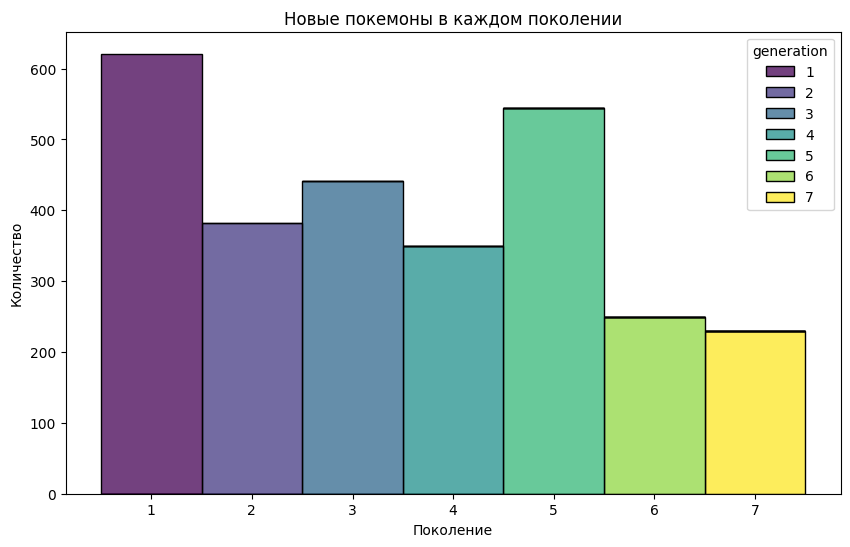

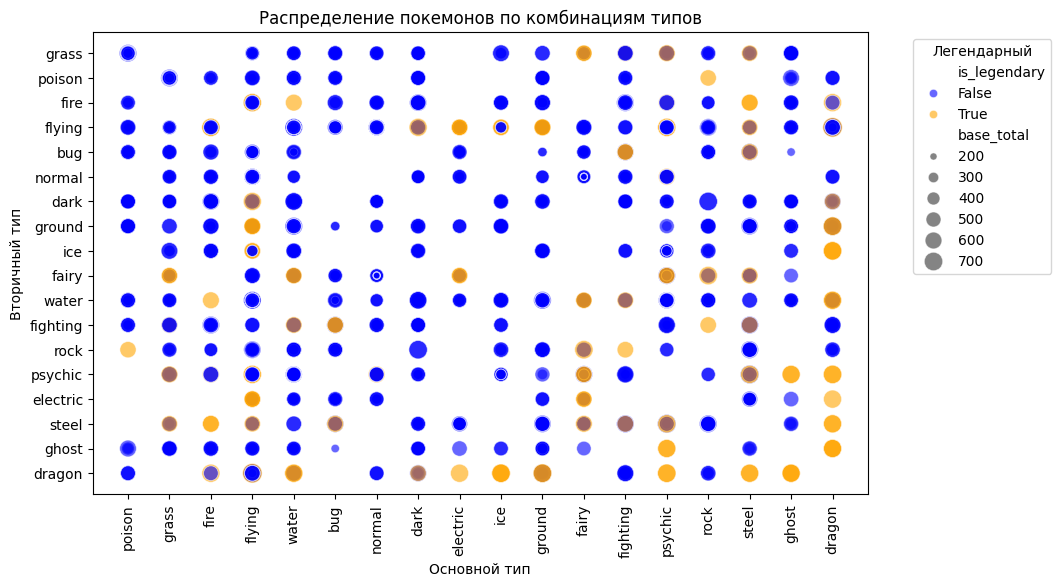

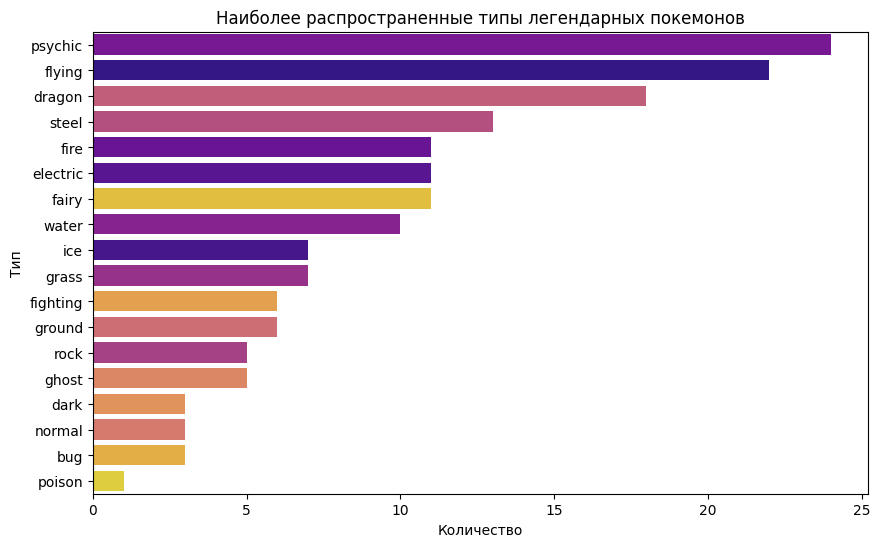

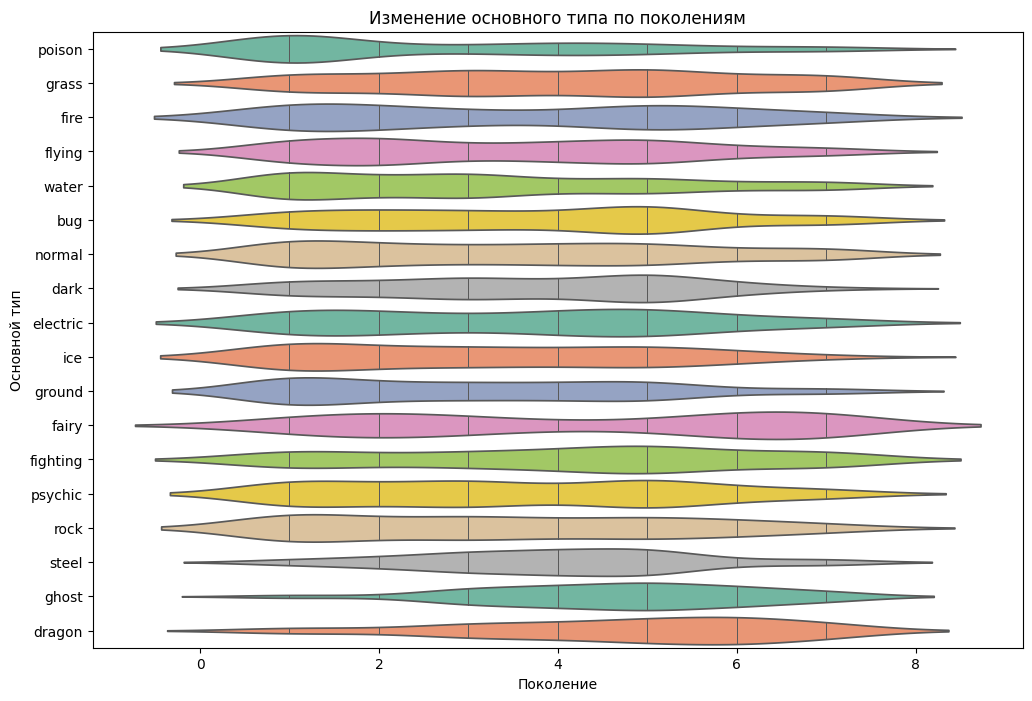

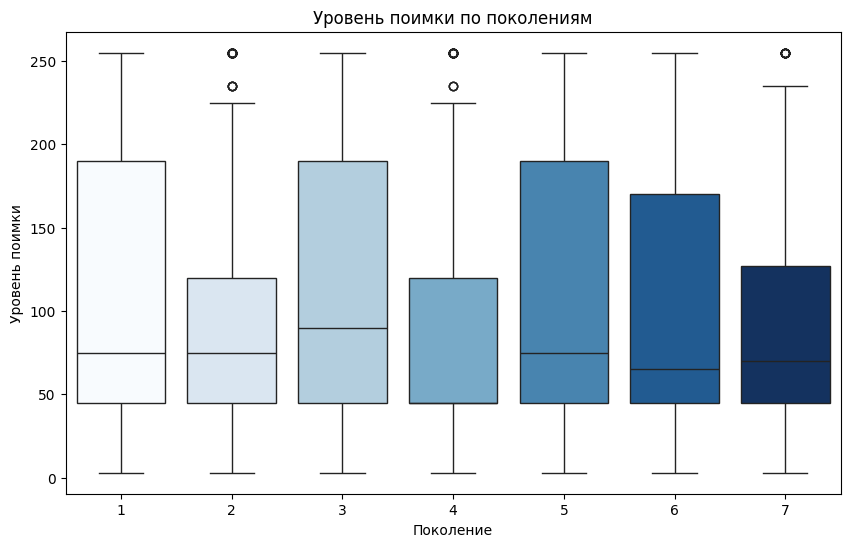

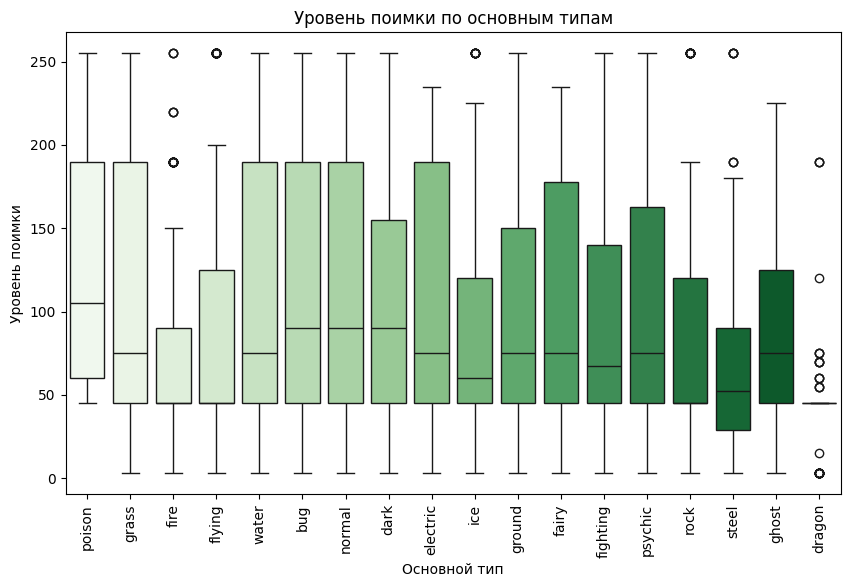

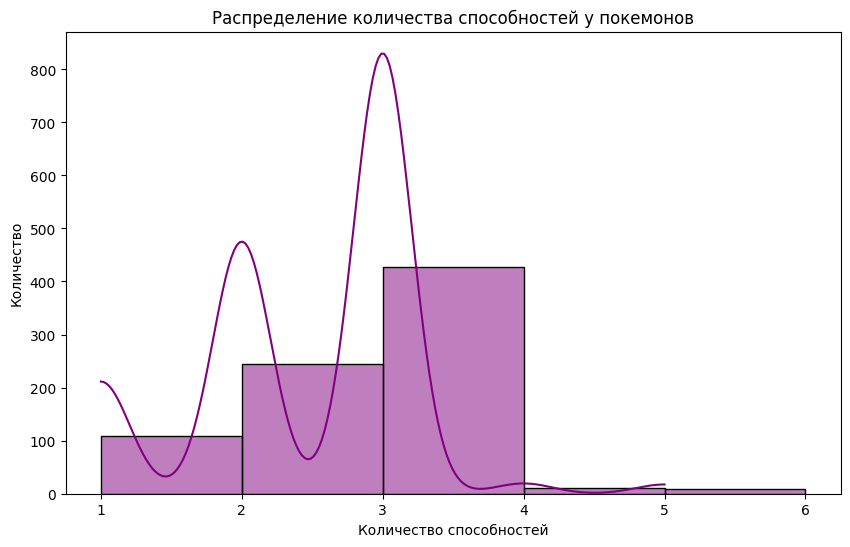

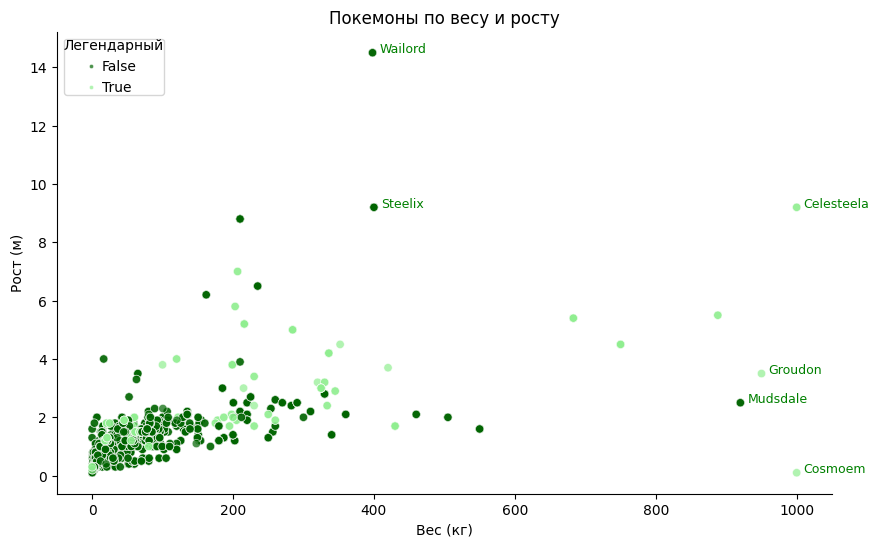

Лучшее поколение с точки зрения средних характеристик: Поколение 4


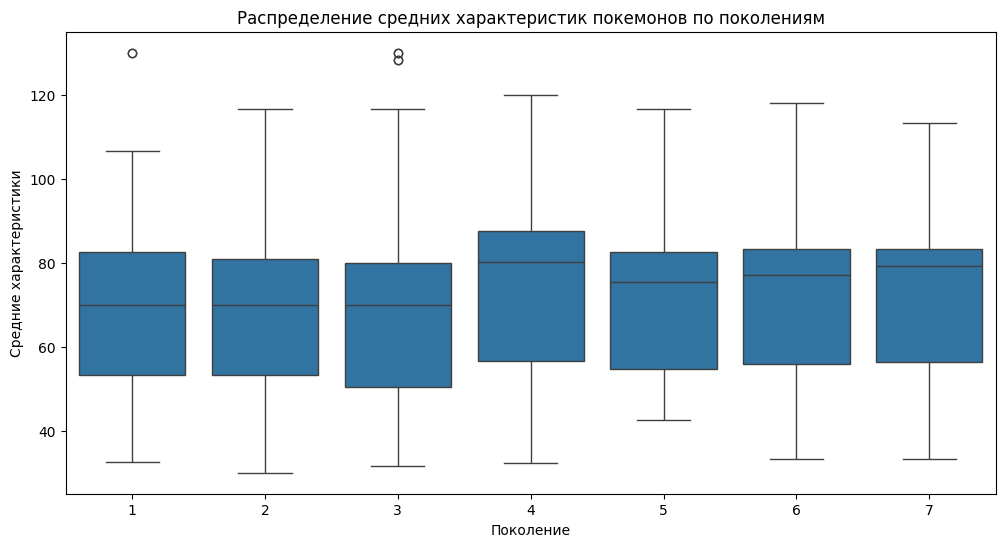

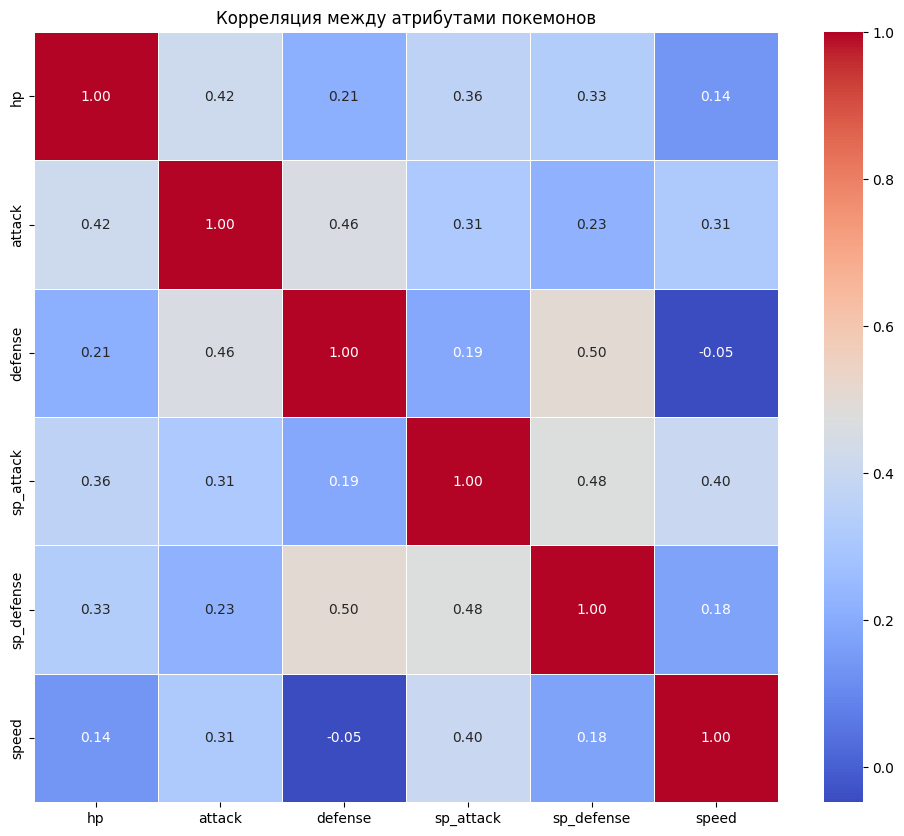

10 лучших покемонов по суммарным характеристикам:
Mewtwo с суммарными характеристиками 780
Rayquaza с суммарными характеристиками 780
Kyogre с суммарными характеристиками 770
Groudon с суммарными характеристиками 770
Arceus с суммарными характеристиками 720
Zygarde с суммарными характеристиками 708
Tyranitar с суммарными характеристиками 700
Salamence с суммарными характеристиками 700
Metagross с суммарными характеристиками 700
Latias с суммарными характеристиками 700


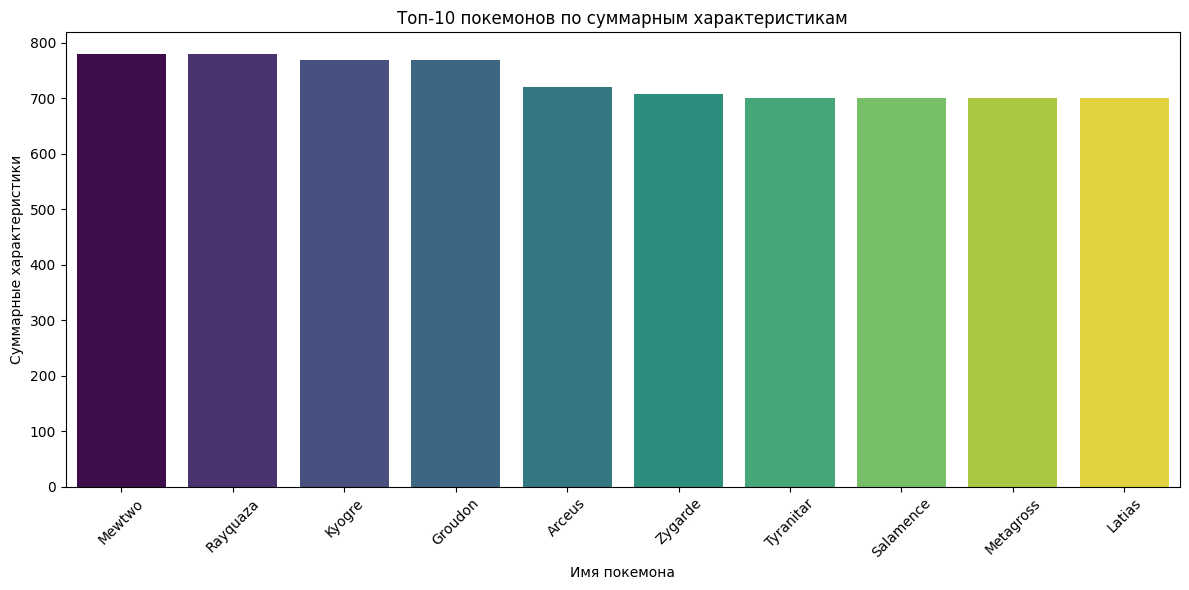

In [4]:
# Извлекаем данные из базы данных
df = viz.fetch_data_from_db()

viz.new_pokemons_per_generation(df)
viz.pokemons_by_type_combination(df)
viz.common_legendary_types(df)
viz.primary_type_change_by_generation(df)
viz.easiest_generation_to_catch(df)
viz.easiest_type_to_catch(df)
viz.average_abilities_per_pokemon(df)
viz.tallest_and_heaviest_pokemon(df)
viz.best_generation(df)
viz.attribute_correlations(df)
viz.best_pokemon(df)